In [1]:
%load_ext autoreload
%autoreload 2

# About

This notebooks performs benchmarks on the "standard solvers".

There are two standard solvers:

* `scipy.linalg.sylvester`: Bartels-Stewart algorithm, uses `TRSYL` from LAPACK to solve the simplified eqation
* `solve_sylvester_linear`: reformulate the equation as a linear system and solve with `numpy.linalg.solve`

Note that the provided framework for benchmarking (via the function `benchmark_utils.benchmark`) **checks by default the validity every solution produced** to ensure consistency.

## Reminder

The `solve_sylvester_linear` uses the property that the Sylvester equation

$$AX - XB = C$$

can be formulated as

$$\mathcal A \mathbf x = \mathbf c \; ,$$

with $\mathcal A := \mathbb I_n \otimes A - B^\top \otimes \mathbb I_m, \; \mathbf x := \text{vec}(X), \; \mathbf c := \text{vec}(C)$. Refer to the report for details.

# Benchmark standard solvers



## Howto

We'll use `benchmark_utils.benchmark`, which provides an easy interface to vary parameters. Under the hood, it uses the function `benchmark_utils.multiple_runs` to which it passes a `solve_fun`. This solves the equation several times with random matrices of given dimensions, optionally checks the validity of the solution, and returns the computation times of each run. This will allow us to have a **mean** and **standard deviation** of the computational time.

In [2]:
from benchmark_utils import benchmark, compute_nruns
from utils import solve_sylvester_scipy

For instance, let's use the built-in scipy solver of the Sylvester equation. We vary the size of the matrices:

In [3]:
r = benchmark(
    solve_sylvester_scipy, 
    vary_param=('dim', [(10, 10), (20, 20), (100, 100)]), 
    log_context={'test': 'test'}
)
r

dim=(10, 10) 5 runs
dim=(20, 20) 5 runs
dim=(100, 100) 5 runs


[{'dim': (10, 10),
  'time': [0.00036454200744628906,
   0.00011444091796875,
   0.00010395050048828125,
   0.00010371208190917969,
   0.00010204315185546875],
  'test': 'test'},
 {'dim': (20, 20),
  'time': [0.00031566619873046875,
   0.0002524852752685547,
   0.00024819374084472656,
   0.0002422332763671875,
   0.0002562999725341797],
  'test': 'test'},
 {'dim': (100, 100),
  'time': [0.023352861404418945,
   0.0505373477935791,
   0.02408456802368164,
   0.021408557891845703,
   0.023058652877807617],
  'test': 'test'}]

## Note on `compute_nruns`

This is used under the hood by `benchmark()` function if you provide `n_runs=(nruns_min, nruns_max)`.

Say we have:

* smallest matrix size: 10x10
* Biggest matrix size: 1000x1000

And we want:

* 100 runs for smallest
* 2 runs for biggest

Illustration:

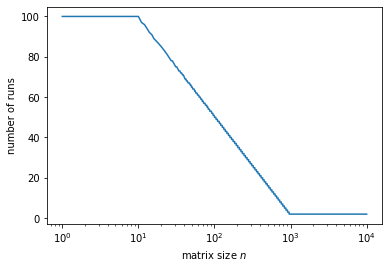

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1, 10000)
y = list(map(lambda n: compute_nruns(10, 100, 1000, 2, n), x))
plt.semilogx(x, y);
plt.xlabel('matrix size $n$')
plt.ylabel('number of runs');

## Benchmark scipy solver

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
nruns_min, nruns_max = (2, 100)

dimensions = [(n, n) for n in np.logspace(1, 3.40, dtype=int, num=15)]
dimensions

[(10, 10),
 (14, 14),
 (22, 22),
 (32, 32),
 (48, 48),
 (71, 71),
 (106, 106),
 (158, 158),
 (235, 235),
 (349, 349),
 (517, 517),
 (768, 768),
 (1140, 1140),
 (1692, 1692),
 (2511, 2511)]

In [7]:
res_scipy = benchmark(
    solve_sylvester_scipy,
    vary_param=('dim', dimensions),
    log_context={
        'solve_fun': 'syl_scipy'
    },
    n_runs=(nruns_min, nruns_max)
)

dim=(10, 10) 100 runs
dim=(14, 14) 94 runs
dim=(22, 22) 86 runs
dim=(32, 32) 79 runs
dim=(48, 48) 72 runs
dim=(71, 71) 65 runs
dim=(106, 106) 58 runs
dim=(158, 158) 51 runs
dim=(235, 235) 44 runs
dim=(349, 349) 36 runs
dim=(517, 517) 30 runs
dim=(768, 768) 23 runs
dim=(1140, 1140) 16 runs
dim=(1692, 1692) 9 runs
dim=(2511, 2511) 2 runs


In [8]:
def format_results(res_dic):
    df = pd.DataFrame(res_dic)
    df['time_mean'] = df.time.apply(np.mean)
    df['time_std'] = df.time.apply(np.std)
    df['m'] = df.dim.apply(lambda e: e[0])
    df['n'] = df.dim.apply(lambda e: e[1])
    df['time_lst'] = df.time.copy()
    df.drop(columns='time', inplace=True)
    return df

In [9]:
df = format_results(res_scipy)
df

,dim,solve_fun,time_mean,time_std,m,n,time_lst
0,"(10, 10)",syl_scipy,0.000100,0.000017,10,10,"[0.0002503395080566406, 0.00011444091796875, 0..."
1,"(14, 14)",syl_scipy,0.000149,0.000008,14,14,"[0.00015854835510253906, 0.0001523494720458984..."
2,"(22, 22)",syl_scipy,0.000284,0.000009,22,22,"[0.0003142356872558594, 0.0002980232238769531,..."
3,"(32, 32)",syl_scipy,0.000571,0.000011,32,32,"[0.0005908012390136719, 0.0005779266357421875,..."
4,"(48, 48)",syl_scipy,0.001411,0.000082,48,48,"[0.0013437271118164062, 0.0013554096221923828,..."
5,"(71, 71)",syl_scipy,0.005439,0.006061,71,71,"[0.00396728515625, 0.004088878631591797, 0.003..."
6,"(106, 106)",syl_scipy,0.028154,0.013119,106,106,"[0.07665729522705078, 0.012686729431152344, 0...."
7,"(158, 158)",syl_scipy,0.042520,0.016990,158,158,"[0.06836128234863281, 0.06786561012268066, 0.0..."
8,"(235, 235)",syl_scipy,0.113755,0.025466,235,235,"[0.08127927780151367, 0.08770227432250977, 0.1..."
9,"(349, 349)",syl_scipy,0.196549,0.018025,349,349,"[0.19087719917297363, 0.23731231689453125, 0.2..."


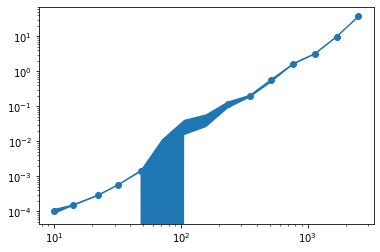

In [10]:
plt.loglog(df.n, df.time_mean, '-o')

plt.fill_between(df.n, df.time_mean - df.time_std, df.time_mean + df.time_std)

In [11]:
from utils import solve_sylvester_linear

In [12]:
dimensions = [(n, n) for n in np.logspace(1, 2.05, dtype=int, num=10)]
dimensions

[(10, 10),
 (13, 13),
 (17, 17),
 (22, 22),
 (29, 29),
 (38, 38),
 (50, 50),
 (65, 65),
 (85, 85),
 (112, 112)]

In [13]:
res_linear = benchmark(
    solve_sylvester_linear,
    vary_param=('dim', dimensions),
    log_context={
        'solve_fun': 'syl_linear'
    },
    n_runs=(nruns_min, nruns_max)
)

dim=(10, 10) 100 runs
dim=(13, 13) 89 runs
dim=(17, 17) 78 runs
dim=(22, 22) 68 runs
dim=(29, 29) 56 runs
dim=(38, 38) 45 runs
dim=(50, 50) 34 runs
dim=(65, 65) 24 runs
dim=(85, 85) 13 runs
dim=(112, 112) 2 runs


In [14]:
df = format_results(res_linear)

In [15]:
df

,dim,solve_fun,time_mean,time_std,m,n,time_lst
0,"(10, 10)",syl_linear,0.000916,0.003875,10,10,"[0.0007412433624267578, 0.00021028518676757812..."
1,"(13, 13)",syl_linear,0.000466,0.000723,13,13,"[0.0003974437713623047, 0.0003561973571777344,..."
2,"(17, 17)",syl_linear,0.001493,0.005346,17,17,"[0.0008883476257324219, 0.0008022785186767578,..."
3,"(22, 22)",syl_linear,0.006331,0.011982,22,22,"[0.002292633056640625, 0.002153635025024414, 0..."
4,"(29, 29)",syl_linear,0.009533,0.007095,29,29,"[0.008080005645751953, 0.016417503356933594, 0..."
5,"(38, 38)",syl_linear,0.033849,0.004929,38,38,"[0.0301513671875, 0.031366825103759766, 0.0323..."
6,"(50, 50)",syl_linear,0.139327,0.010877,50,50,"[0.1330423355102539, 0.17487716674804688, 0.13..."
7,"(65, 65)",syl_linear,0.668639,0.343297,65,65,"[0.48966121673583984, 0.6423828601837158, 0.56..."
8,"(85, 85)",syl_linear,2.066620,0.469928,85,85,"[1.8087446689605713, 1.788835048675537, 2.1843..."
9,"(112, 112)",syl_linear,8.745095,0.026968,112,112,"[8.71812629699707, 8.77206301689148]"


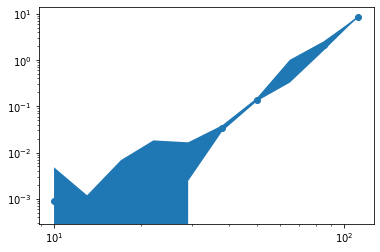

In [16]:
plt.loglog(df.n, df.time_mean, '-o')
plt.fill_between(df.n, df.time_mean - df.time_std, df.time_mean + df.time_std)

## Save results

In [17]:
import json

In [18]:
res_dump = res_linear + res_scipy

# Map np.int64 to int
for v in res_dump:
    v['dim'] = (int(v['dim'][0]), int(v['dim'][1]))

In [19]:
with open('res/benchmark_std.json', 'w') as f:
    json.dump(res_dump, f)

# Benchmark Bartel Stewart

We want to measure the time required to compute the schur decomposition and the back mapping. We will use the scipy's solver. The function `utils.solve_bertel_stewart` handles the coordinate change and provides separate times for the shur decomp, solving triangular system and back mapping. 

In [51]:
dimensions = [(n, n) for n in np.logspace(1, 3.40, dtype=int, num=15)]
dimensions

[(10, 10),
 (14, 14),
 (22, 22),
 (32, 32),
 (48, 48),
 (71, 71),
 (106, 106),
 (158, 158),
 (235, 235),
 (349, 349),
 (517, 517),
 (768, 768),
 (1140, 1140),
 (1692, 1692),
 (2511, 2511)]

In [52]:
res_bs_scipy = benchmark(
    solve_sylvester_scipy,
    vary_param=('dim', dimensions),
    bartel_stewart=True,
    log_context={
        'solve_fun': 'syl_scipy',
        'bartel_stewart': True
    },
    n_runs=(nruns_min, nruns_max)
)

dim=(10, 10) 100 runs
dim=(14, 14) 94 runs
dim=(22, 22) 86 runs
dim=(32, 32) 79 runs
dim=(48, 48) 72 runs
dim=(71, 71) 65 runs
dim=(106, 106) 58 runs
dim=(158, 158) 51 runs
dim=(235, 235) 44 runs
dim=(349, 349) 36 runs
dim=(517, 517) 30 runs
dim=(768, 768) 23 runs
dim=(1140, 1140) 16 runs
dim=(1692, 1692) 9 runs
dim=(2511, 2511) 2 runs


In [53]:
def format_results_bs(res_dic):
    df = pd.DataFrame(res_dic)
    df.time = df.time.apply(np.array)
    df['time_schur'] = df.time.apply(lambda lst: [tpl[0] for tpl in lst])
    df['time_solve'] = df.time.apply(lambda lst: [tpl[1] for tpl in lst])
    df['time_back'] = df.time.apply(lambda lst: [tpl[2] for tpl in lst])
    df.drop(columns='time', inplace=True)

    for e in df.columns:
        if e.startswith('time_'):
            df[f'{e}_mean'] = df[e].apply(np.mean)
            df[f'{e}_std'] = df[e].apply(np.std)
    
    df['m'] = df.dim.apply(lambda e: e[0])
    df['n'] = df.dim.apply(lambda e: e[1])
    
    return df

In [54]:
df = format_results_bs(res_bs_scipy)
df.head(2)

,dim,solve_fun,bartel_stewart,time_schur,time_solve,time_back,time_schur_mean,time_schur_std,time_solve_mean,time_solve_std,time_back_mean,time_back_std,m,n
0,"(10, 10)",syl_scipy,True,"[0.0004780292510986328, 0.00011110305786132812...","[0.00015401840209960938, 0.0001032352447509765...","[1.6689300537109375e-05, 1.0251998901367188e-0...",0.000089,0.000039,0.000079,0.000009,0.000010,2.848418e-06,10,10
1,"(14, 14)",syl_scipy,True,"[0.00014829635620117188, 0.0001237392425537109...","[0.00012040138244628906, 0.0001208782196044921...","[1.1682510375976562e-05, 1.0967254638671875e-0...",0.000129,0.000016,0.000110,0.000009,0.000011,2.492490e-07,14,14


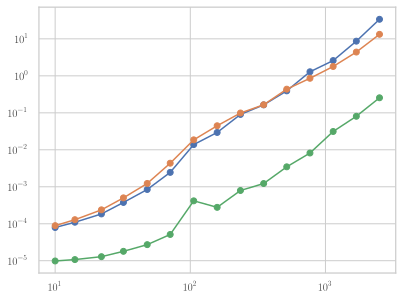

In [55]:
plt.loglog(df.n, df.time_solve_mean, '-o')
plt.loglog(df.n, df.time_schur_mean, '-o')
plt.loglog(df.n, df.time_back_mean, '-o')

## Solve 

In [56]:
# Map np.int64 to int
for v in res_bs_scipy:
    v['dim'] = (int(v['dim'][0]), int(v['dim'][1]))
    
with open('res/benchmark_bartel_stewart_scipy.json', 'w') as f:
    json.dump(res_bs_scipy, f)

# Reload results

In [57]:
import json

with open('res/benchmark_bartel_stewart_scipy.json') as f:
    res_bs_scipy = json.load(f)
    
    
with open('res/benchmark_std.json') as f:
    res_dump = json.load(f)
    
res_linear = [e for e in res_dump if e['solve_fun'] == 'syl_linear']
res_scipy = [e for e in res_dump if e['solve_fun'] == 'syl_scipy']

## Load matlab benchmark

In [58]:
df_matlab_syl = pd.read_csv(
    'matlab/benchmark_sylvester.csv',
    names=['n', 'time_mean', 'time_std']
)
df_matlab_syl.head()

,n,time_mean,time_std
0,31,0.004263,0.005665
1,44,0.004294,0.001802
2,63,0.004777,0.000208
3,89,0.011540,0.009081
4,125,0.013048,0.000637


In [59]:
df_matlab_schur = pd.read_csv(
    'matlab/benchmark_schur.csv',
    names=['n', 'time_mean', 'time_std']
)
df_matlab_schur.head()

,n,time_mean,time_std
0,31,0.001078,0.000362
1,44,0.000595,0.000143
2,63,0.001092,0.000133
3,89,0.003844,0.002868
4,125,0.004912,0.000219


In [60]:
df_matlab_matmul = pd.read_csv(
    'matlab/benchmark_matmul.csv',
    names=['n', 'time_mean', 'time_std']
)
df_matlab_matmul.head()

,n,time_mean,time_std
0,31,0.001391,0.002924
1,44,0.000870,0.000469
2,63,0.000016,0.000004
3,89,0.000033,0.000014
4,125,0.000066,0.000029


# Plotting for the report

In [61]:
from ipypublish import nb_setup
plt = nb_setup.setup_matplotlib()
import seaborn as sns
sns.set(style='whitegrid')

/home/maousi/miniconda3/envs/ada/lib/python3.9/site-packages/ipypublish/scripts/nb_setup.py:226: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams[key] = val
/home/maousi/miniconda3/envs/ada/lib/python3.9/site-packages/ipypublish/scripts/nb_setup.py:226: MatplotlibDeprecationWarning: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  mpl.rcParams[key] = val
/home/maousi/miniconda3/envs/ada/lib/python3.9/site-packages/ipypublish/scripts/nb_setup.py:226: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  mpl.rcParams[key] = val
/home/maousi/miniconda3/envs/ada/lib/python3.9/site-packages/ipypublish/scripts/nb_setup.py:226: MatplotlibDeprecati

In [62]:
df_std_scipy = format_results(res_scipy)
df_std_scipy.head(2)

,dim,solve_fun,time_mean,time_std,m,n,time_lst
0,"[10, 10]",syl_scipy,0.000100,0.000017,10,10,"[0.0002503395080566406, 0.00011444091796875, 0..."
1,"[14, 14]",syl_scipy,0.000149,0.000008,14,14,"[0.00015854835510253906, 0.0001523494720458984..."


In [63]:
df_std_lin = format_results(res_linear)
df_std_lin.head(2)

,dim,solve_fun,time_mean,time_std,m,n,time_lst
0,"[10, 10]",syl_linear,0.000916,0.003875,10,10,"[0.0007412433624267578, 0.00021028518676757812..."
1,"[13, 13]",syl_linear,0.000466,0.000723,13,13,"[0.0003974437713623047, 0.0003561973571777344,..."


In [64]:
df_bs_scipy = format_results_bs(res_bs_scipy)
df_bs_scipy.head(2)

,dim,solve_fun,bartel_stewart,time_schur,time_solve,time_back,time_schur_mean,time_schur_std,time_solve_mean,time_solve_std,time_back_mean,time_back_std,m,n
0,"[10, 10]",syl_scipy,True,"[0.0004780292510986328, 0.00011110305786132812...","[0.00015401840209960938, 0.0001032352447509765...","[1.6689300537109375e-05, 1.0251998901367188e-0...",0.000089,0.000039,0.000079,0.000009,0.000010,2.848418e-06,10,10
1,"[14, 14]",syl_scipy,True,"[0.00014829635620117188, 0.0001237392425537109...","[0.00012040138244628906, 0.0001208782196044921...","[1.1682510375976562e-05, 1.0967254638671875e-0...",0.000129,0.000016,0.000110,0.000009,0.000011,2.492490e-07,14,14


In [81]:
def plot_multiple_runs(df, x, y, ystd, label, color=None, ls='-', alpha=0.3):
    plt.loglog(df[x], df[y], '-o', label=label, color=color, ls=ls)
    plt.fill_between(df[x], df[y] - df[ystd], df[y] + df[ystd], alpha=alpha, color=color)

In [66]:
cols = sns.color_palette()

## Figure

In [67]:
def plot_power_law(xgrid, degree, shift=-2, ax=None):
    """Plot a straight line y = x ^ degree on a log-log scale."""
    if ax is None:
        ax = plt.gca()
        
    y = xgrid ** degree * 10**shift
    
    plt.plot(xgrid, y)

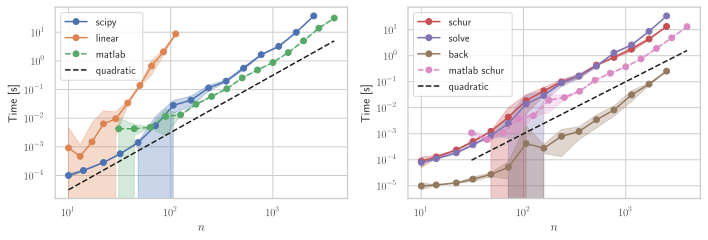

In [91]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3.5))

# Plot solving time of solvers used for small systems
plt.axes(ax[0])
plot_multiple_runs(df_std_scipy, 'n', 'time_mean', 'time_std', 'scipy', color=cols[0])
plot_multiple_runs(df_std_lin, 'n', 'time_mean', 'time_std', 'linear', color=cols[1])
# Plot also matlab sylvester
plot_multiple_runs(df_matlab_syl, 'n', 'time_mean', 'time_std', 'matlab', color=cols[2], ls='--', alpha=0.25)

quad_grid = np.concatenate((df_std_lin.n, df_matlab_syl.n))
quad_grid.sort()
plt.loglog(quad_grid, quad_grid ** 2 * 10**(-6.5), '--k', label='quadratic')

plt.legend()
plt.axes(ax[1])

# Plot time decomposition into the three phases of Bartel-Stewart
plot_multiple_runs(df_bs_scipy, 'n', 'time_schur_mean', 'time_schur_std', label='schur', color=cols[3])
plot_multiple_runs(df_bs_scipy, 'n', 'time_solve_mean', 'time_solve_std', label='solve', color=cols[4])
plot_multiple_runs(df_bs_scipy, 'n', 'time_back_mean', 'time_back_std', label='back', color=cols[5])
# Plot matlab for schur
plot_multiple_runs(df_matlab_schur, 'n', 'time_mean', 'time_std', 'matlab schur', color=cols[6], ls='--', alpha=0.25)

quad_grid = df_matlab_schur.n
plt.loglog(quad_grid, quad_grid ** 2 * 10**(-7), '--k', label='quadratic')


plt.legend()
ax[0].set_xlabel('$n$'); ax[1].set_xlabel('$n$')
ax[0].set_ylabel('Time [s]'); ax[1].set_ylabel('Time [s]');

plt.tight_layout()
plt.savefig('res/benchmark_intro.pdf', bbox_inches='tight')

### Get the slopes

In [83]:
from sklearn.linear_model import LinearRegression

def get_slope(df, x: str, y: str, loglog=True, ignore_below: int = 100):
    """
    Compute the slope of the regression line y = f(x), where x and y are the labels of the series in the dataframe.
    Small matrix sizes often yield timing with huge variance, ignore_below handles this.
    
    :return: slope, intercept
    """
    x = df[x]
    y = df[y]
    mask = (x > ignore_below)
    x, y = x[mask], y[mask]
    x, y = x.values.reshape(-1, 1), y.values.reshape(-1, 1)
    if loglog:
        x, y = np.log(x), np.log(y)
        
    model = LinearRegression().fit(x, y)
    return model.coef_[0, 0], model.intercept_[0]

In [84]:
# Test
x = np.linspace(0, 5, 10)
test = pd.DataFrame([x, x**3]).T
get_slope(test, 0, 1, ignore_below=0)

(3.000000000000001, -8.881784197001252e-16)

In [87]:
dfs = {
    'linear': df_std_lin,
    'scipy': df_std_scipy,
    'bs_scipy': df_bs_scipy,
    'matlab_syl': df_matlab_syl,
    'matlab_schur': df_matlab_schur,
    'matlab_matmul': df_matlab_matmul
}

slopes = []
print(f'{"df":<15} {"column":<20} slope')
for name, df in dfs.items():
    columns_meantime = [e for e in df.columns if e.endswith('_mean') and e.startswith('time')]
    for col in columns_meantime:
        ignore_below = 60 if name == 'linear' else 1000
        slope, _ = get_slope(df, 'n', col, ignore_below=ignore_below)
        print(f'{name:<15} {col:<20} {slope:.3}')
        slopes.append({
            'df': name,
            'column': col,
            'slope': slope
        })

df              column               slope
linear          time_mean            4.73
scipy           time_mean            3.1
bs_scipy        time_schur_mean      2.54
bs_scipy        time_solve_mean      3.26
bs_scipy        time_back_mean       2.66
matlab_syl      time_mean            2.7
matlab_schur    time_mean            2.75
matlab_matmul   time_mean            2.66


In [88]:
pd.DataFrame(slopes)

,df,column,slope
0,linear,time_mean,4.727516
1,scipy,time_mean,3.104866
2,bs_scipy,time_schur_mean,2.537420
3,bs_scipy,time_solve_mean,3.255052
4,bs_scipy,time_back_mean,2.657267
5,matlab_syl,time_mean,2.701849
6,matlab_schur,time_mean,2.748671
7,matlab_matmul,time_mean,2.656289
